In [22]:
import pandas as pd
import plotly as px
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt



In [23]:
#save path to data set 
NEregion_path="Northeast_data.csv"

In [24]:
# Use Pandas to read data
NEregion= pd.read_csv('Northeast_data.csv')
NEregion

,State,Region,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Connecticut,Northeast,Male,Excellent,0,0,Within past 2 years (1 year but less than 2 ye...,Yes,6,1 to 5,...,1.68,68.04,24.21,No,Yes,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
1,Connecticut,Northeast,Female,Fair,10,0,Within past year (anytime less than 12 months ...,No,7,None of them,...,1.57,70.76,28.53,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
2,Connecticut,Northeast,Female,Excellent,0,0,Within past year (anytime less than 12 months ...,No,7,None of them,...,1.63,61.23,23.17,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
3,Connecticut,Northeast,Female,Good,0,0,Within past year (anytime less than 12 months ...,Yes,7,1 to 5,...,1.55,70.31,29.29,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
4,Connecticut,Northeast,Female,Very good,2,4,Within past 5 years (2 years but less than 5 y...,Yes,8,1 to 5,...,1.57,77.11,31.09,No,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56903,Vermont,Northeast,Female,Good,0,0,Within past year (anytime less than 12 months ...,No,7,1 to 5,...,1.57,56.70,22.86,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
56904,Vermont,Northeast,Female,Excellent,0,5,Within past year (anytime less than 12 months ...,Yes,8,None of them,...,1.73,70.31,23.57,Yes,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
56905,Vermont,Northeast,Male,Very good,1,1,Within past year (anytime less than 12 months ...,No,6,None of them,...,1.78,61.23,19.37,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Tested positive using home test without a heal...
56906,Vermont,Northeast,Male,Very good,0,10,5 or more years ago,Yes,4,None of them,...,1.93,92.99,24.95,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No


In [25]:
# Heart Attack section

In [26]:

Heart_Attack_status = NEregion["HadHeartAttack"].value_counts()
Heart_Attack_status

No     53963
Yes     2945
Name: HadHeartAttack, dtype: int64

In [27]:
Heart_Attack_status_df= pd.DataFrame({"HadHeartAttack":["Yes","No"],
                               "Total":["53963","2945"] })
Heart_Attack_status_df.head()

,HadHeartAttack,Total
0,Yes,53963
1,No,2945


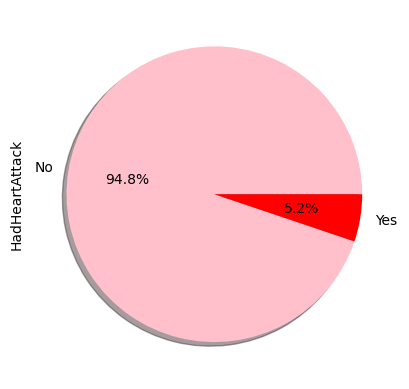

In [28]:
Heart_Attack_status = NEregion["HadHeartAttack"].value_counts()
colors=['pink', 'red']
Heart_Attack_status.plot.pie(autopct = "%1.1f%%", colors=colors, shadow=True )


plt.show()

In [36]:
#States total count (yes and no)
states_NorthEast= NEregion.groupby(["State"])["HadHeartAttack"].count()
states_NorthEast

State
Connecticut             5053
Delaware                2155
District of Columbia    1725
Maine                   6013
Maryland                9165
Massachusetts           5465
New Hampshire           3756
New Jersey              3967
New York                8923
Pennsylvania            2729
Rhode Island            3112
Vermont                 4845
Name: HadHeartAttack, dtype: int64

In [37]:
# States with Heart Attacks 
Heart_Attack_status = NEregion[NEregion['HadHeartAttack']=="Yes"].groupby('State').size()
Heart_Attack_status

State
Connecticut             230
Delaware                108
District of Columbia     59
Maine                   425
Maryland                496
Massachusetts           247
New Hampshire           248
New Jersey              162
New York                416
Pennsylvania            137
Rhode Island            166
Vermont                 251
dtype: int64

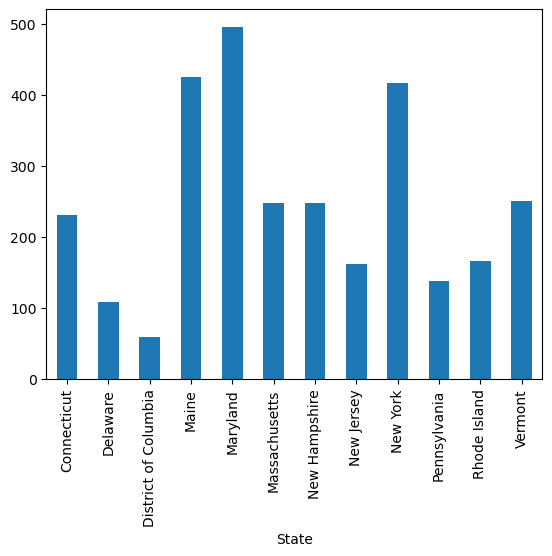

In [38]:
Heart_Attack_status = NEregion[NEregion['HadHeartAttack']=="Yes"].groupby('State').size()
Heart_Attack_status.plot(kind="bar", )

plt.show()

In [ ]:
#no heart attack by gender

In [131]:
No_Heart_attack_gender=NEregion.groupby('Sex')['Sex'].count()
No_Heart_attack_gender

Sex
Female    29669
Male      27239
Name: Sex, dtype: int64

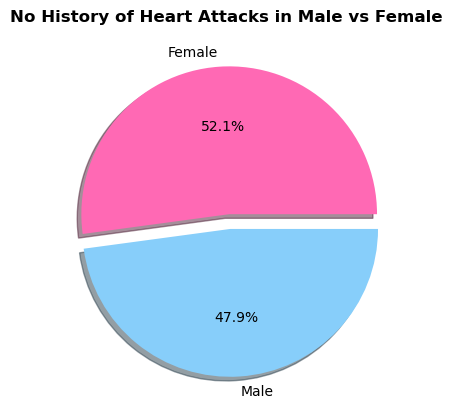

In [132]:
colors=['hotpink','lightskyblue']
labels=No_Heart_attack_gender.index
explode=(0, 0.1)
plt.pie(No_Heart_attack_gender,  explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("No History of Heart Attacks in Male vs Female ", fontweight='bold')
plt.show()

In [ ]:
#heart attack by gender

In [44]:
Heart_Attack_status_gender = NEregion[NEregion['HadHeartAttack']=="Yes"].groupby('Sex').size()
Heart_Attack_status_gender

Sex
Female    1029
Male      1916
dtype: int64

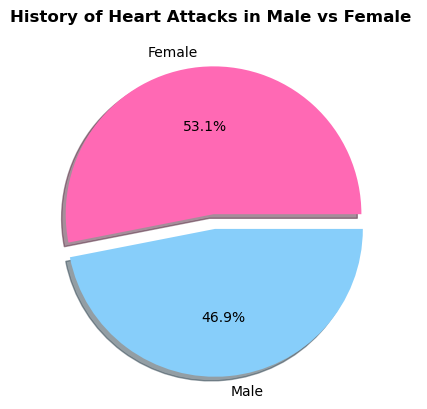

In [55]:
colors=['hotpink','lightskyblue']
labels=No_Heart_attack_gender.index
explode=(0, 0.1)
plt.pie(Heart_Attack_status_gender,  explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("History of Heart Attacks in Male vs Female ", fontweight='bold')
plt.show()

In [ ]:
#Stroke Information section

In [141]:
Stroke_Status=NEregion["HadStroke"].value_counts()
Stroke_Status

No     54794
Yes     2114
Name: HadStroke, dtype: int64

In [142]:
Stroke_Status_df=pd.DataFrame({"HadStroke":["Yes","No"],
                               "Total":["54794","2114"] })
Stroke_Status_df

,HadStroke,Total
0,Yes,54794
1,No,2114


In [143]:
#Stroke by gender

In [144]:
No_Stroke_gender = NEregion[NEregion['HadStroke']=="No"].groupby('Sex').size()
No_Stroke_gender

Sex
Female    28601
Male      26193
dtype: int64

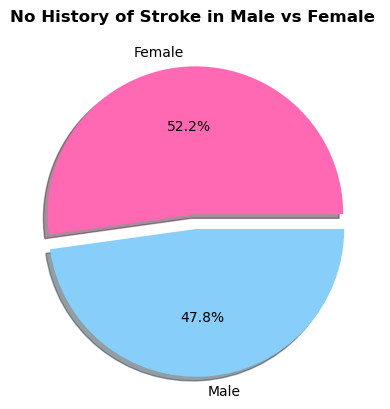

In [145]:
colors=['hotpink','lightskyblue']
labels=No_Stroke_gender.index
explode=(0, 0.1)
plt.pie(No_Stroke_gender,  explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("No History of Stroke in Male vs Female ", fontweight='bold')
plt.show()

In [146]:
Stroke_gender = NEregion[NEregion['HadStroke']=="Yes"].groupby('Sex').size()
Stroke_gender

Sex
Female    1068
Male      1046
dtype: int64

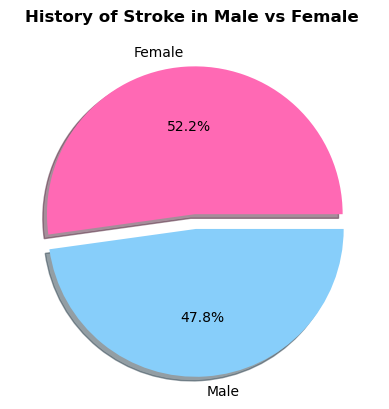

In [147]:
colors=['hotpink','lightskyblue']
labels=Stroke_gender.index
explode=(0, 0.1)
plt.pie(No_Stroke_gender,  explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("History of Stroke in Male vs Female ", fontweight='bold')
plt.show()

In [70]:
#list of states with to stroke 
Stroke_Status = NEregion[NEregion['HadStroke']=="Yes"].groupby('State').size()

Stroke_Status

State
Connecticut             163
Delaware                116
District of Columbia     63
Maine                   277
Maryland                413
Massachusetts           148
New Hampshire           151
New Jersey              132
New York                294
Pennsylvania             99
Rhode Island            108
Vermont                 150
dtype: int64

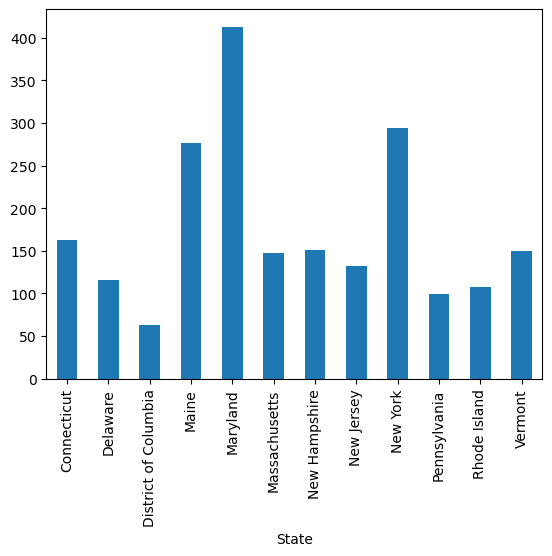

In [71]:
Stroke_Status = NEregion[NEregion['HadStroke']=="Yes"].groupby('State').size()
Stroke_Status.plot(kind="bar", )

plt.show()

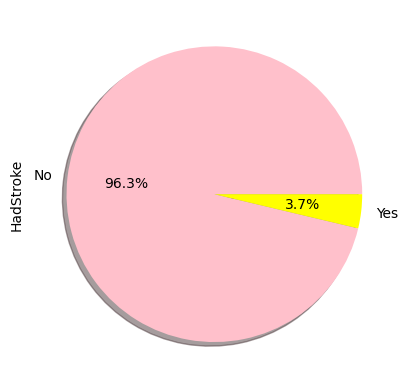

In [61]:
Stroke_Status = NEregion["HadStroke"].value_counts()
colors=['pink', 'yellow']
Stroke_Status.plot.pie(autopct = "%1.1f%%", colors=colors, shadow=True )


plt.show()

In [60]:
#Smoker section

In [61]:

smoker_status = NEregion["SmokerStatus"].value_counts()
smoker_status

Never smoked                             34252
Former smoker                            16616
Current smoker - now smokes every day     4329
Current smoker - now smokes some days     1711
Name: SmokerStatus, dtype: int64

In [62]:
smoker_status_df= pd.DataFrame({"Smoker Status": ["Never smoked", "Former smoker", "Current smoker-now smokes every day","Current smoker-now smokes some days"],
                               "Total": ["34252","16616","4329","1711"]})
smoker_status_df.head()

,Smoker Status,Total
0,Never smoked,34252
1,Former smoker,16616
2,Current smoker-now smokes every day,4329
3,Current smoker-now smokes some days,1711


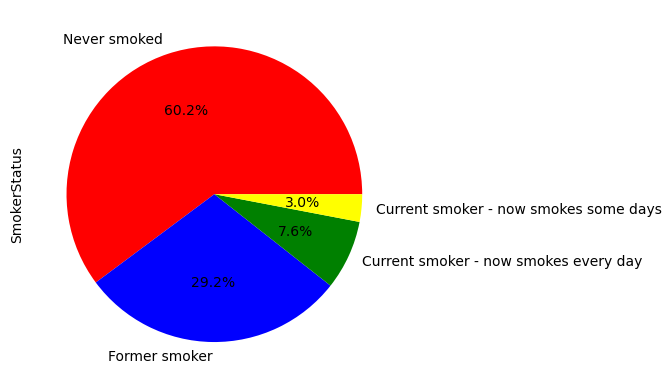

In [89]:
smoker_status = NEregion["SmokerStatus"].value_counts()
colors=['red','blue','green','yellow']
labels=smoker_status
smoker_status.plot.pie(autopct = "%1.1f%%", colors=colors)
plt.show()

In [64]:
#E cigarette Section

In [65]:

Ecigarette_Status= NEregion["ECigaretteUsage"].value_counts()
Ecigarette_Status

Never used e-cigarettes in my entire life    44770
Not at all (right now)                        9688
Use them some days                            1367
Use them every day                            1083
Name: ECigaretteUsage, dtype: int64

In [66]:
Ecigarette_Status_df= pd.DataFrame ({"ECigaretteUsage": ["Never used e-cigarettes in my entire life", "Not at all (right now)", "Use them every day", "Use them some days"],
                                     "Total":["44770","9688","1367","1083"]})
Ecigarette_Status_df
                                

,ECigaretteUsage,Total
0,Never used e-cigarettes in my entire life,44770
1,Not at all (right now),9688
2,Use them every day,1367
3,Use them some days,1083


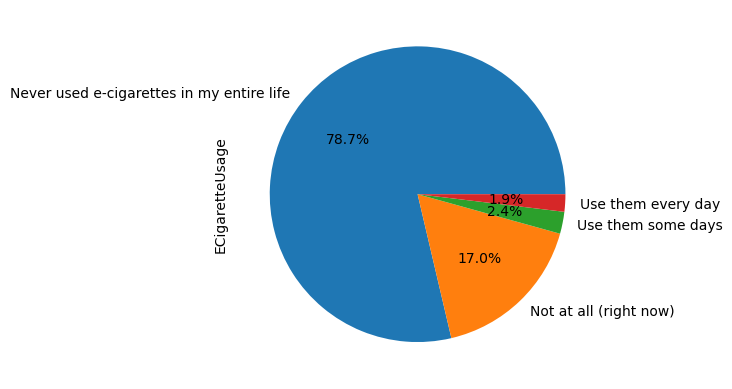

In [91]:
Ecigarette_Status = NEregion["ECigaretteUsage"].value_counts()
Ecigarette_Status.plot.pie(autopct = "%1.1f%%")
plt.show()

In [20]:
#Gender section

In [21]:

gender_count = NEregion["Sex"].value_counts()
gender_count

Female    29669
Male      27239
Name: Sex, dtype: int64

In [22]:
gender_count_df=  pd.DataFrame ({"Sex":["Female","Male"],
                               "Total":[" 29669","27239"] })
gender_count_df.head()

,Sex,Total
0,Female,29669
1,Male,27239


In [23]:
#BMI section

In [24]:
BMI_Average_States = NEregion.groupby(["State"])["BMI"].mean()
BMI_Average_States

State
Connecticut             28.219652
Delaware                29.212404
District of Columbia    27.114139
Maine                   28.526088
Maryland                28.763478
Massachusetts           27.763153
New Hampshire           28.033182
New Jersey              27.966910
New York                28.163643
Pennsylvania            28.754287
Rhode Island            28.142844
Vermont                 27.634991
Name: BMI, dtype: float64

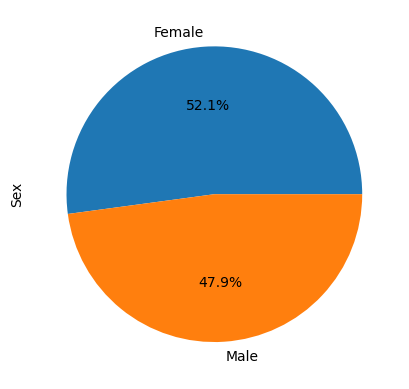

In [25]:
gender_count = NEregion["Sex"].value_counts()
gender_count.plot.pie(autopct = "%1.1f%%")
plt.show()

In [26]:
#Ethnnicity section

In [27]:
Ethnicity=  NEregion["RaceEthnicityCategory"].value_counts()
Ethnicity

White only, Non-Hispanic         44128
Black only, Non-Hispanic          5488
Hispanic                          4477
Other race only, Non-Hispanic     1949
Multiracial, Non-Hispanic          866
Name: RaceEthnicityCategory, dtype: int64

In [28]:
Ethnicity_df=pd.DataFrame ({"RaceEthnicityCategory":["White only, Non-Hispanic","Black only, Non-Hispanic","Hispanic","Other race only, Non-Hispanic","Multiracial, Non-Hispanic"],
                               "Total":[" 44128","5488","4477","1949","866"] })
Ethnicity_df

,RaceEthnicityCategory,Total
0,"White only, Non-Hispanic",44128
1,"Black only, Non-Hispanic",5488
2,Hispanic,4477
3,"Other race only, Non-Hispanic",1949
4,"Multiracial, Non-Hispanic",866


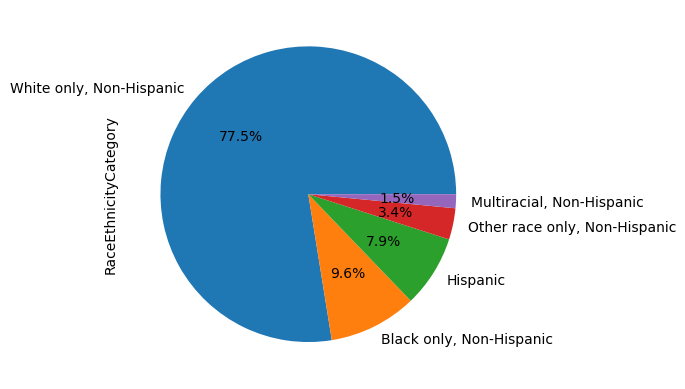

In [29]:
Ethnicity = NEregion["RaceEthnicityCategory"].value_counts()
Ethnicity.plot.pie(autopct = "%1.1f%%")
plt.show()

In [ ]:
#teeth remove section 

In [80]:
Teeth_remove=  NEregion["RemovedTeeth"].value_counts()
Teeth_remove

None of them              30688
1 to 5                    17682
6 or more, but not all     5841
All                        2697
Name: RemovedTeeth, dtype: int64

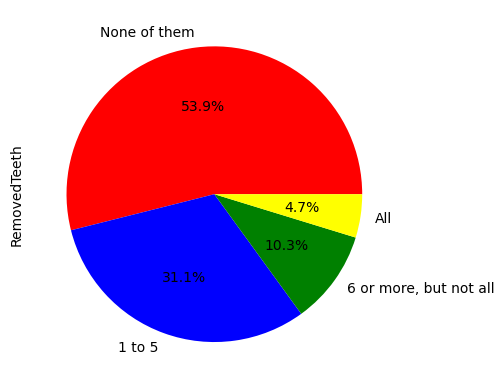

In [82]:
Teeth_remove = NEregion["RemovedTeeth"].value_counts()
colors=['red','blue','green','yellow']
Teeth_remove.plot.pie(autopct = "%1.1f%%", colors=colors)
plt.show()

In [ ]:
# alcohol/ heart attack 

In [120]:
alcohol_heart=NEregion.groupby(['AlcoholDrinkers'])['HadHeartAttack'].count()
alcohol_heart

AlcoholDrinkers
No     22590
Yes    34318
Name: HadHeartAttack, dtype: int64

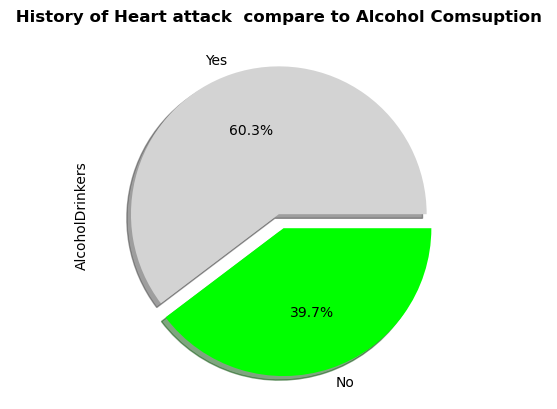

In [121]:
alcohol_heart = NEregion["AlcoholDrinkers"].value_counts()
colors= ('lightgray','lime')
explode=(0, 0.1)
plt.title(" History of Heart attack  compare to Alcohol Comsuption ", fontweight='bold')
alcohol_heart.plot.pie(autopct = "%1.1f%%",colors=colors, explode=explode, shadow=True)
plt.show()

In [122]:
# alcohol/ Stroke 

In [123]:
alcohol_stroke=NEregion.groupby(['AlcoholDrinkers'])['HadStroke'].count()
alcohol_stroke

AlcoholDrinkers
No     22590
Yes    34318
Name: HadStroke, dtype: int64

In [124]:
alcohol_stroke=NEregion.groupby(['AlcoholDrinkers'])['HadStroke'].count()
alcohol_stroke.plot
plt.show()

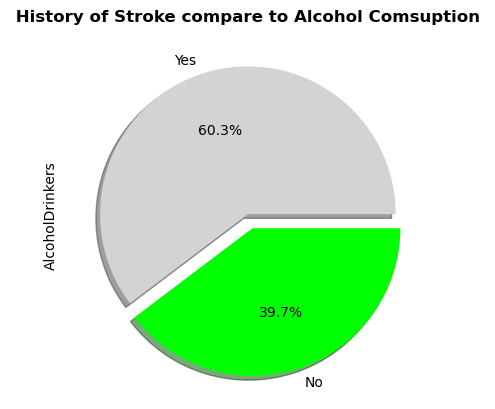

In [128]:
alcohol_stroke = NEregion["AlcoholDrinkers"].value_counts()
colors= ('lightgray','lime')
explode=(0, 0.1)
plt.title(" History of Stroke compare to Alcohol Comsuption ", fontweight='bold')
alcohol_stroke.plot.pie(autopct = "%1.1f%%",colors=colors, explode=explode, shadow=True)
plt.show()

In [30]:
#General Health section 

In [148]:
General_Health=NEregion.groupby(['GeneralHealth'])['State'].count()
General_Health

GeneralHealth
Excellent    10686
Fair          6250
Good         16876
Poor          1730
Very good    21366
Name: State, dtype: int64

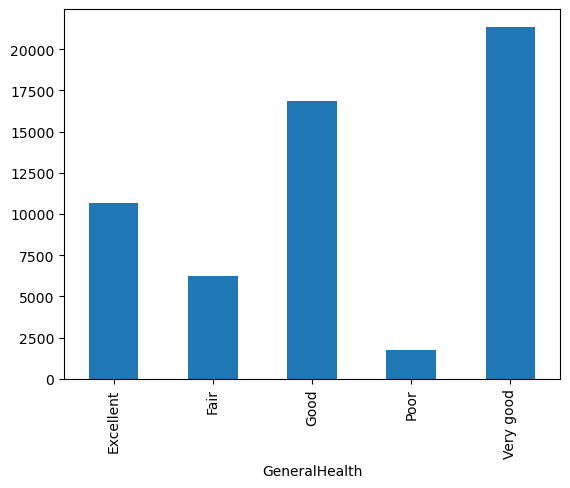

In [149]:
General_Health=NEregion.groupby(['GeneralHealth'])['State'].count()
General_Health.plot(kind="bar")
plt.show()